# XGBoost ANALYSIS

With a dataset of the whole sales of different customers for different products and regions

### IMPORTS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler


data = pd.read_csv("customers _data.csv")

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### **Data explanation**:

Channel: (Nominal)
- Horeca (Hotel/Restaurant/Cafe)
- Retail channel

Region: (Nominal)
- Lisnon
- Oporto
- Other

Fresh
- Annual spending on fresh products (Continuous)

Milk
- Annual spending on milk products (Continuous)

Grocery
- Annual spending on grocery products (Continuous)

Frozen
- Annual spending on frozen products (Continuous)

Detergents_Paper
- Annual spending on detergents and paper products (Continuous)

Delicassen
- Annual spending on and delicatessen products (Continuous)

## EXPLORATORY DATA ANALYSIS (EDA)









In [4]:
data.shape

(440, 8)

There are 440 instances and 8 attributes in this dataset

In [5]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


The data type of all the columns is numerical (integer) and I have no nulls so i don0t need to do further imputations

If i look at the DF and the Info related to the Channel variable i see that it is already encrypted containing values 1 and 2.

If i look into the description of the column (Horeca: (Hotel/Restaurant/Cafe) or Retail channel: (Nominal))i see that these two values classify the customers from two different channels:
-  Horeca (Hotel/Retail/Café) customers
-  Retail channel (nominal) customers

To corraborate that there is no missing vaues:

In [7]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<AxesSubplot:>

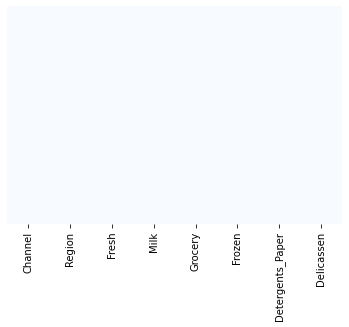

In [8]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues")
#to visualize that there is no missing values

### VISUALITZATION

To visualize the relationship and distribution to different variables i use Pairplot and Histogram:

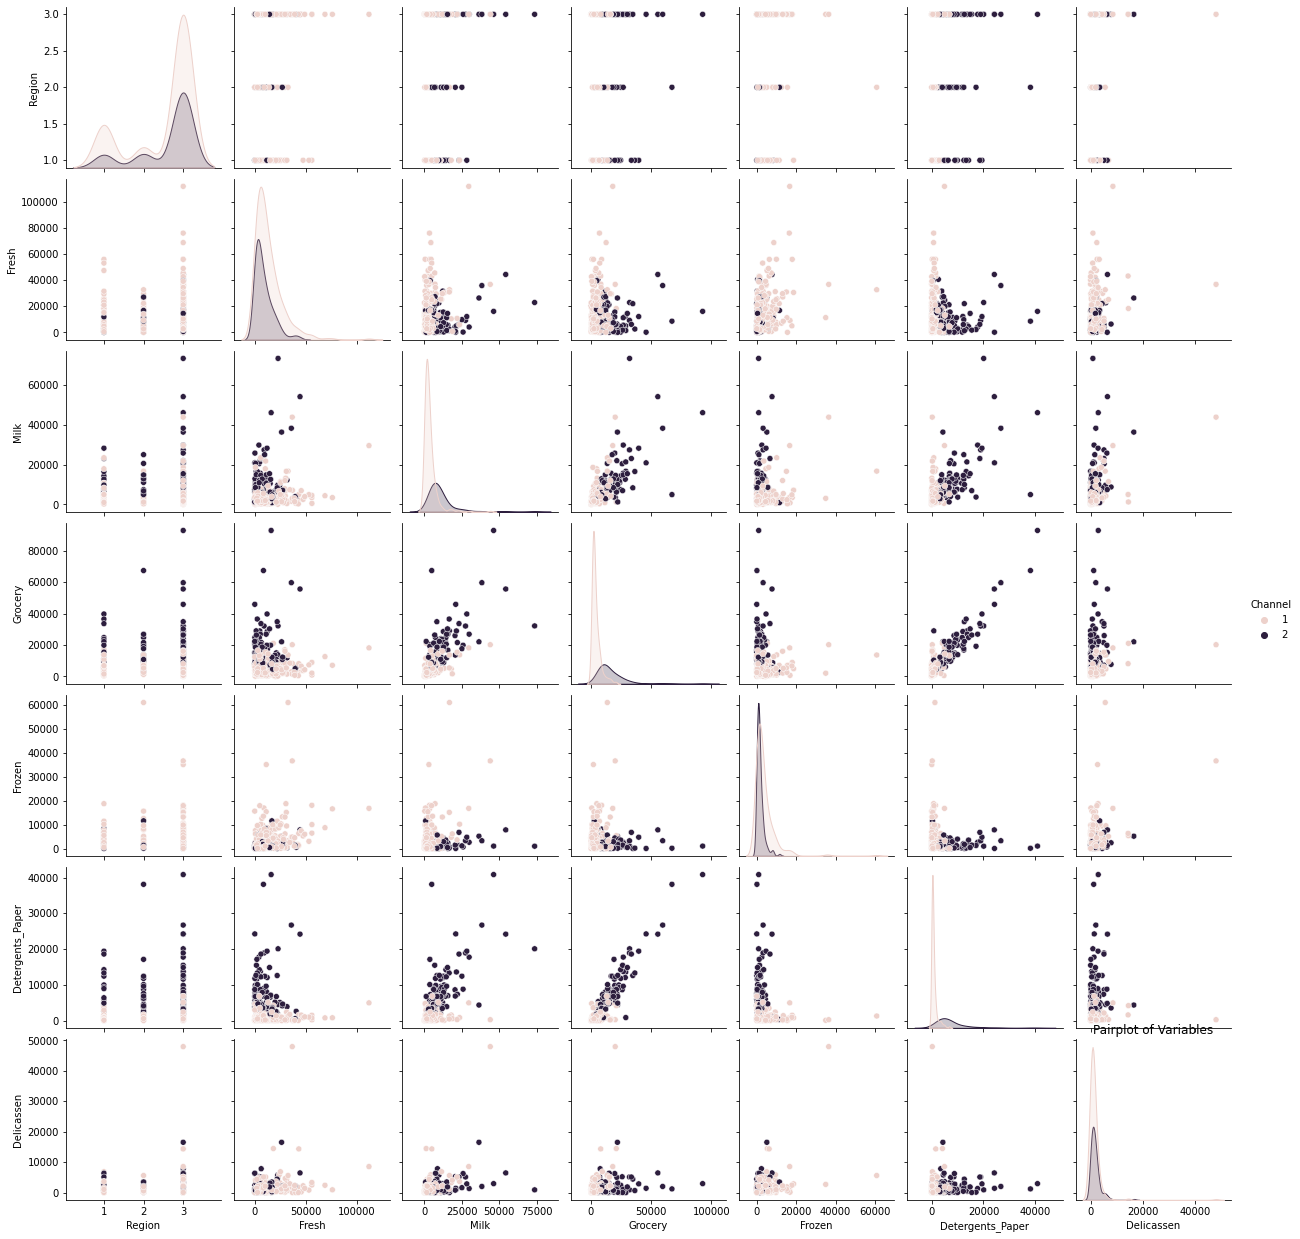

In [9]:
sns.pairplot(data, hue='Channel', diag_kind='kde')
plt.title('Pairplot of Variables')
plt.show()

array([[<AxesSubplot:title={'center':'Channel'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Fresh'}>],
       [<AxesSubplot:title={'center':'Milk'}>,
        <AxesSubplot:title={'center':'Grocery'}>,
        <AxesSubplot:title={'center':'Frozen'}>],
       [<AxesSubplot:title={'center':'Detergents_Paper'}>,
        <AxesSubplot:title={'center':'Delicassen'}>, <AxesSubplot:>]],
      dtype=object)

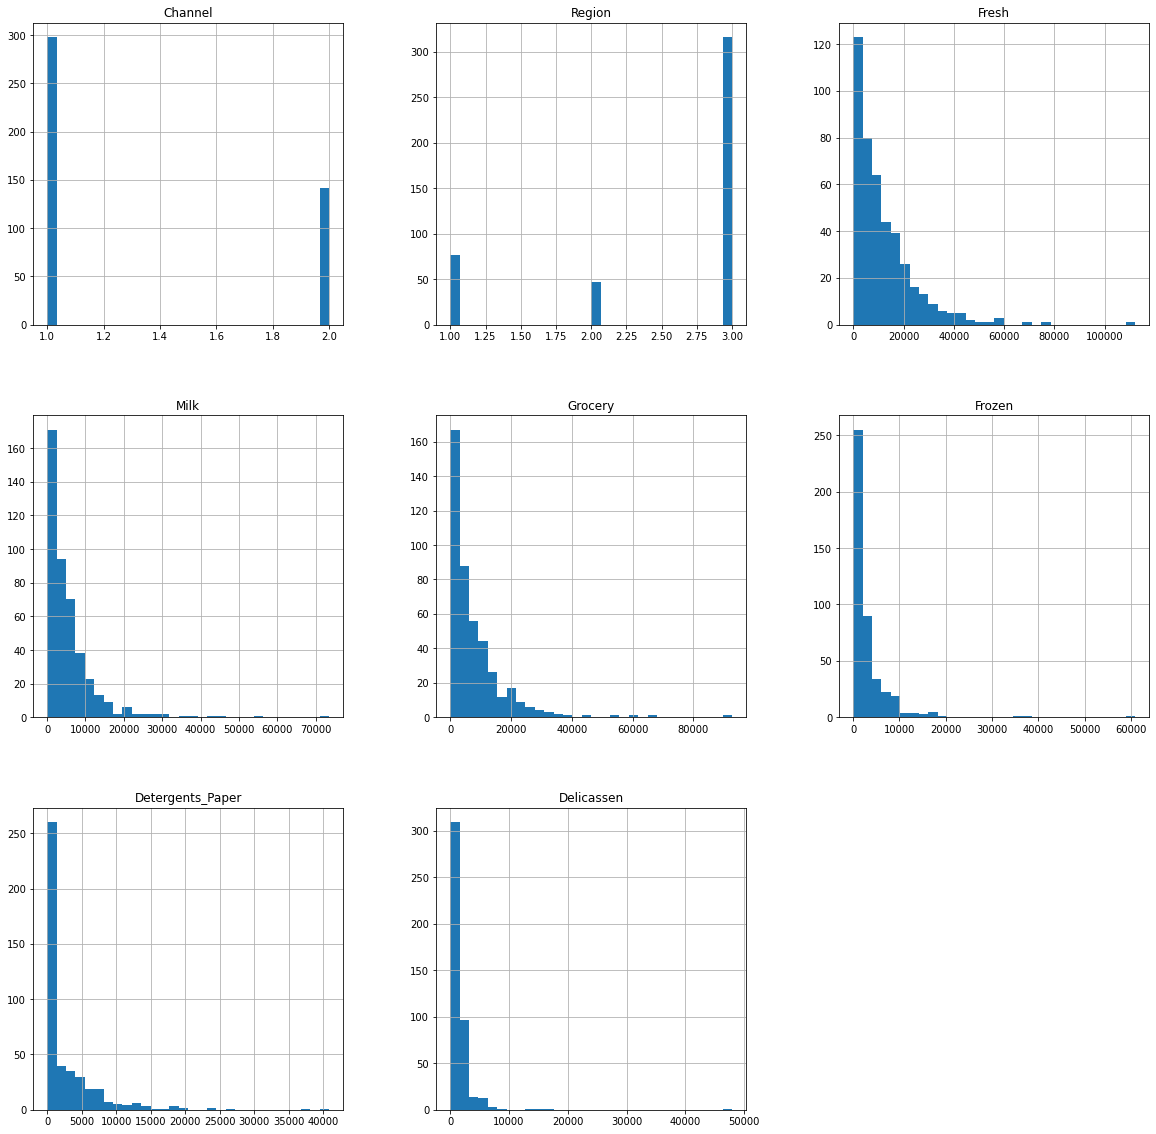

In [10]:
data.hist(bins = 30, figsize = (20,20))

I use Boxplot to visualize the distribution of spending across different categories:

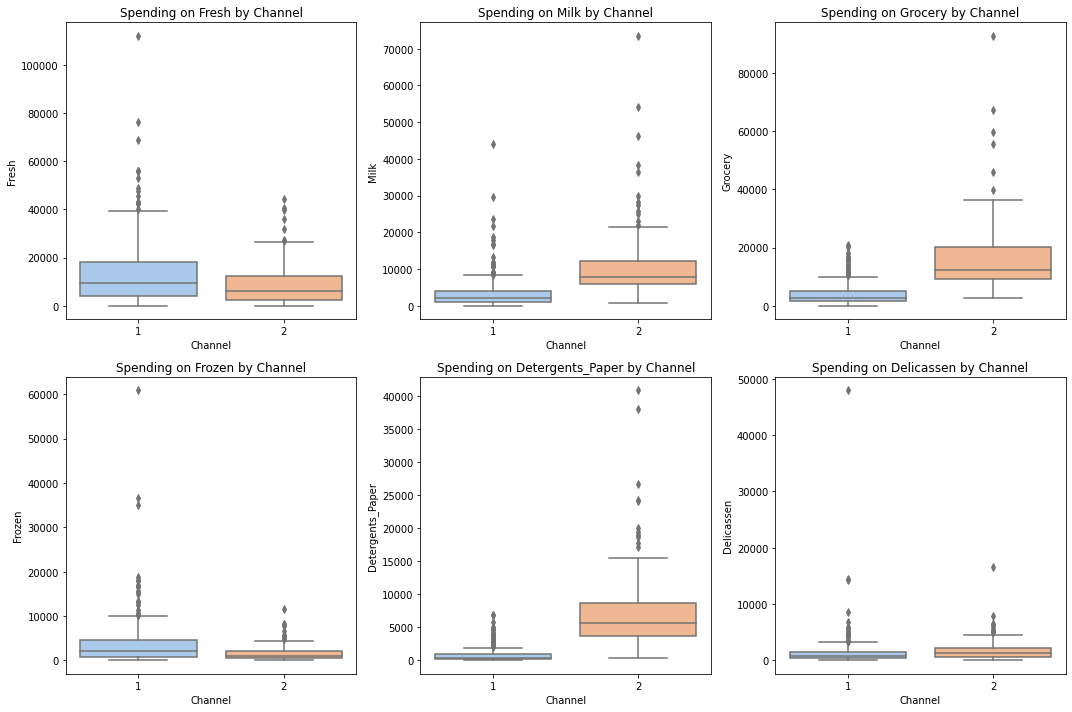

In [11]:
# List of columns to visualize
columns_to_plot = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create boxplots for each column in the list, grouped by 'Channel' with the 'pastel' color palette
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Channel', y=column, data=data, palette='pastel')
    plt.title(f"Spending on {column} by Channel")

plt.tight_layout()
plt.show()


Bar plot to compare spending across regions:

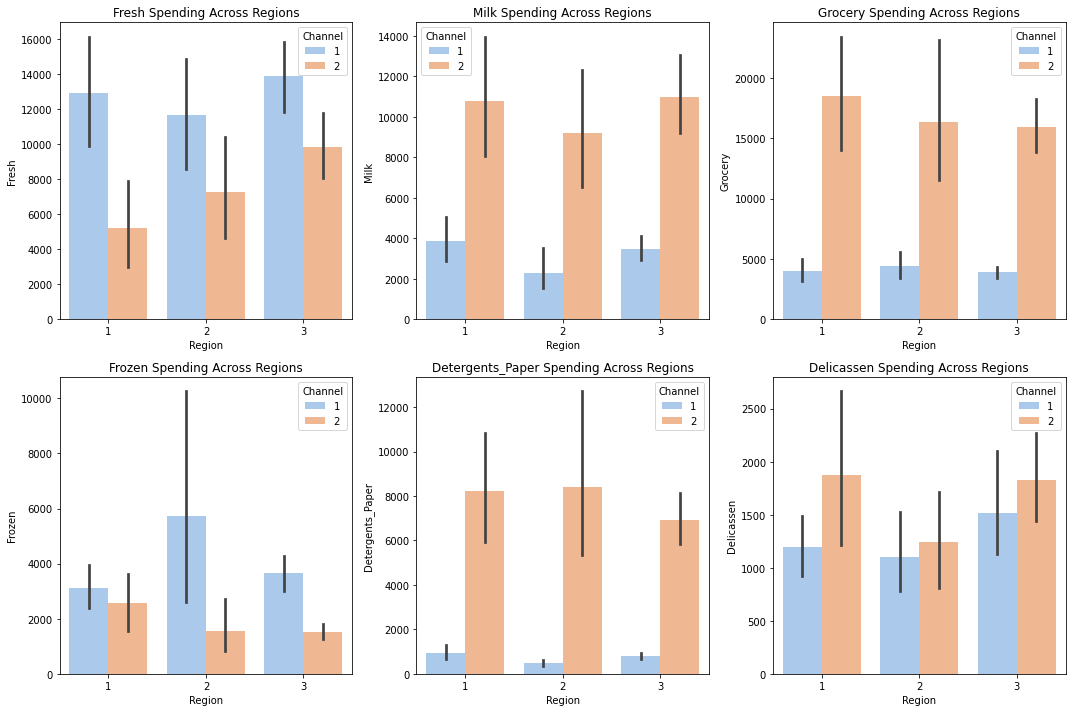

In [12]:
# List of columns to visualize
columns_to_plot = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create bar plots for each column in the list, across 'Region' and differentiated by 'Channel' with the 'pastel' color palette
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Region', y=column, hue='Channel', data=data, palette='pastel')
    plt.title(f'{column} Spending Across Regions')
    plt.legend(title='Channel')

plt.tight_layout()
plt.show()


I can see that the channel 2 is the predominant one in almost every region and the most balanced buys are the fresh products

In the channel 2 region 1 they consume a lot of delicatessen but less frozen food. Therefore, if it's retail channel it make sense for the different taste of people

The channel 1 is the majority in fresh food and frozen food, so if it's horeca channe it makes sense

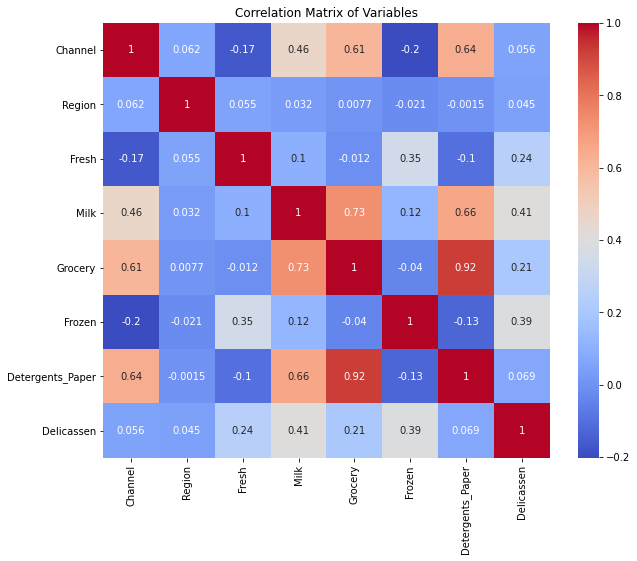

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

I cannot see clearly high correlated variables. Only the variable grocery with detergents and papers which is 0.92

## DATA **PREPARATION**

In [14]:
#Definding my target and features
X = data.drop('Channel', axis=1)
y = data['Channel']

In [15]:
X

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [16]:
y

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

The problem here is that my y label can see that the y label contain values as 1 and 2 so this values should be transformed in order to build the model into 0 and 1 for further analysis.

In [17]:
# convert labels into BINARY values

y[y == 2] = 0
y[y == 1] = 1

In [18]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

Tree-based algorithms like XGBoost usually do not require feature scaling as they are not affected by the scale of the variables. XGBoost operates by recursively splitting nodes based on feature values, and the relative ordering of features is what's important, rather than their specific magnitudes.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
print(f'X_train dims: {X_train.shape}')
print(f'y_train dims: {y_train.shape}')
print(f'X_test dims: {X_test.shape}')
print(f'y_test dims: {y_test.shape}')

X_train dims: (330, 7)
y_train dims: (330,)
X_test dims: (110, 7)
y_test dims: (110,)


In [21]:
#  training data
X_train_cat = X_train[['Region']]
ohe = OneHotEncoder(sparse=False)
cat_data_ohe = ohe.fit_transform(X_train_cat)
cat_data_ohe = pd.DataFrame(cat_data_ohe, columns=ohe.get_feature_names_out(X_train_cat.columns))

X_train_non_cat = X_train.drop(columns=['Region'])
X_train_full = pd.concat([X_train_non_cat.reset_index(drop=True), cat_data_ohe], axis=1)

# testing data
X_test_cat = X_test[['Region']]
cat_data_ohe_test = ohe.transform(X_test_cat)
cat_data_ohe_test = pd.DataFrame(cat_data_ohe_test, columns=ohe.get_feature_names_out(X_test_cat.columns))

X_test_non_cat = X_test.drop(columns=['Region'])
X_test_full = pd.concat([X_test_non_cat.reset_index(drop=True), cat_data_ohe_test], axis=1)

## **MODEL XGBOOST**

In [22]:
!pip install xgboost
import xgboost as xgb


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [23]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 5,
            'alpha': 0,
            'learning_rate': 1.0,
            'n_estimators':100
        }


# instantiate the classifier
xgb_clf = XGBClassifier(**params) #fit my model with the right parameters


# fit the classifier to the training data
xgb_clf.fit(X_train_full, y_train)

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.0, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

## Make predictions with XGBoost Classifier

In [24]:
# on test data

y_pred = xgb_clf.predict(X_test_full)

In [25]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [26]:
from sklearn.metrics import accuracy_score

print('XGBoost model ACCURACY score is {:.2f}  %'.format( 100 * accuracy_score(y_pred, y_test)))

XGBoost model ACCURACY score is 88.18  %


Overall the score with XGBoost is pretty high

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

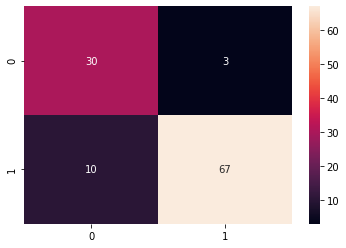

In [28]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

The true positives and true negatives which means what the model predicted is true are the highest ones so my model is quite stable

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82        40
           1       0.87      0.96      0.91        70

    accuracy                           0.88       110
   macro avg       0.89      0.85      0.87       110
weighted avg       0.88      0.88      0.88       110



Overall the model has a good permormance metrics

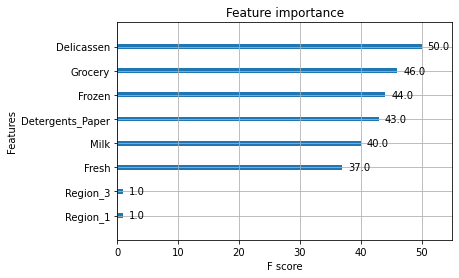

<Figure size 1152x864 with 0 Axes>

In [30]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

The features Dleicatessen and Detergent_Ppaer have the highest importance score among all the features and i saw that it is a category (detergents) bought by the majority of channel 2. This graph allows me to discart the features less important and analyze only the most relevant ones.

### K-fold Cross Validation

In [31]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [32]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)
#i use area under the curve as a metric

In [33]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.943394,0.006175,0.939301,0.010420
1,0.956169,0.010158,0.948217,0.008694
2,0.957925,0.008354,0.950256,0.012729
3,0.963100,0.005174,0.948043,0.014022
4,0.964848,0.004909,0.952190,0.015712


SAVING THE TRAINED MODEL:

In [34]:
import joblib
joblib.dump(xgb_clf, "XGBoost.pkl")
my_model = joblib.load("XGBoost.pkl")